# Đồ án tốt nghiệp Data Science

Danh sách thành viên:
*   Nguyễn Phạm Duy
*   Phạm Mạch Lam Phương

## Project 2: Recommender System
> Shopee là một hệ sinh thái thương mại “all in one”, trong đó có shopee.vn, là một website thương mại điện tử hàng đầu của Việt Nam và khu vực Đông Nam Á.


> Trên trang này đã triển khai nhiều tiện ích hỗ trợ nâng cao trải nghiệm người dùng và họ muốn xây dựng nhiều tiện ích hơn nữa.
> Giả sử công ty này chưa triển khai Recommender System và bạn được yêu cầu triển khai hệ thống này, bạn sẽ làm gì?

*Sử dụng phương pháp Surprise Recommendation

# Bước 1: Business Understanding
Shopee là một nền tảng thương mại điện tử hàng đầu Đông Nam Á, thuộc sở hữu của Sea Group, cung cấp dịch vụ mua sắm trực tuyến với nhiều ngành hàng và tích hợp thanh toán, vận chuyển.

Shopee áp dụng hệ thống đề xuất (recommendation system) để:
- Tăng trải nghiệm người dùng: Gợi ý sản phẩm phù hợp với sở thích, giúp người dùng dễ dàng tìm kiếm và mua sắm.
- Tăng doanh số bán hàng: Đề xuất sản phẩm liên quan, khuyến khích mua thêm, tăng giá trị đơn hàng.
- Cá nhân hóa: Tạo sự khác biệt, thu hút và giữ chân khách hàng.
- Tối ưu hóa hiển thị sản phẩm: Hiển thị sản phẩm phù hợp với từng đối tượng, tăng hiệu quả quảng cáo.

In [1]:
# Import thư viện cần thiết
import surprise
import pandas as pd
import numpy as np
from surprise import *
from surprise.model_selection.validation import cross_validate
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Bước 2: Data Understanding
Cung cấp 2 tập dữ liệu

*   Products_ThoiTrangNam_rating_raw.csv: toàn bộ thông tin rating của từng sản phẩm

*   Products_ThoiTrangNam_raw.csv: Thông tin, miêu tả của các sản phẩm


In [ ]:
# Đọc dữ liệu từ file Products_ThoiTrangNam_rating_raw.csv
df_rating = pd.read_csv("Products_ThoiTrangNam_rating_raw.csv", sep= "\t")
df_rating.head()

,product_id,user_id,user,rating
0,190,1,karmakyun2nd,5
1,190,2,tranquangvinh_vv,5
2,190,3,nguyenquoctoan2005,5
3,190,4,nguyenthuyhavi,5
4,190,5,luonganh5595,5


Products_ThoiTrangNam_rating_raw.csv là dữ liệu tất cả các lượt rate sảng phẩm từ khách hàng bao gồm các thuộc tính:
- product_id: Mã sản phẩm
- user_id: Mã khác hàng
- user: Tên khác hàng
- rating: Điểm rating của khác hàng

In [ ]:
# Đọc dữ liệu từ file Products_ThoiTrangNam_raw.csv
df_product = pd.read_csv("Products_ThoiTrangNam_raw.csv")
df_product = df_product[df_product["category"].str.startswith("Thời Trang Nam")]
df_product.head(5)

,product_id,product_name,category,sub_category,link,image,price,rating,description
0,190,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
1,191,"Áo Ba Lỗ Nam Trắng Chất Cotton Siêu Mát, Siêu Đẹp",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...,https://cf.shopee.vn/file/c7ea4c6574dc79be6b26...,26800.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nXu...
2,192,"Áo Ba Lỗ Nam Tyasuo chất vải co dãn mát, không...",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...,https://cf.shopee.vn/file/6f93bcda10efe374f8cc...,39500.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nTh...
3,193,ÁO BA LỖ HÀNG VIỆT NAM 100% COTTON,Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...,https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a...,16500.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
4,194,Áo Thun Nam Thể Thao Ba Lỗ Mẫu Mới Siêu Đẹp (B...,Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...,NaN,45000.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...


Products_ThoiTrangNam_raw.csv là tất cả các dữ liệu về các sản phẩm bao gồm các thuộc tính:
- product_id: Mã sản phẩm
- product_name: Tên sản phẩm
- categoty: Tên ngành hàng
- sub_category: Nhóm sản phẩm
- Link: Sản phẩm
- image: Ảnh sản phẩm
- price: Giá sản phẩm
- rate: Điểm đnáh giá sản phẩm
- description: Tất cả các miêu tả vê sản phẩm

# Bước 3: Data Preparation/ Prepare

In [ ]:
# Lấy ra ba thông tin chính cho mô hình
df_rating = df_rating[["product_id", "user_id", "rating"]]
print(df_rating.head(5))

   product_id  user_id  rating
0         190        1       5
1         190        2       5
2         190        3       5
3         190        4       5
4         190        5       5


In [ ]:
# Ta thực hiện merge 2 bảng thông tin rating và bảng master sản phẩm để tiến thành EDA dữ liệu
df = pd.merge(df_rating, df_product, on="product_id", how="left")
df.head(5)

,product_id,user_id,rating_x,product_name,category,sub_category,link,image,price,rating_y,description
0,190,1,5,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
1,190,2,5,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
2,190,3,5,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
3,190,4,5,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
4,190,5,5,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024680 entries, 0 to 1024679
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   product_id    1024680 non-null  int64  
 1   user_id       1024680 non-null  int64  
 2   rating_x      1024680 non-null  int64  
 3   product_name  1019376 non-null  object 
 4   category      1019376 non-null  object 
 5   sub_category  1019376 non-null  object 
 6   link          1019376 non-null  object 
 7   image         586820 non-null   object 
 8   price         1019376 non-null  float64
 9   rating_y      1019376 non-null  float64
 10  description   1019376 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 93.8+ MB


In [ ]:
df = df.rename(columns={"rating_x": "rating"})

Dữ liệu không bị null

Tiếp theo ta kiểm tra có user nào đánh giá sản phẩm từ 2 lần trở lên hay không

## EDA dữ liệu

## Phân tích biến số

In [ ]:
df[["rating", "price"]].describe().applymap(lambda x: f"{x:,.0f}")

,rating,price
count,"1,024,680","1,019,376"
mean,5,"127,558"
std,1,"119,151"
min,1,"1,000"
25%,5,"55,000"
50%,5,"99,000"
75%,5,"165,000"
max,5,"5,000,000"


Nhìn vào bảng thống kê, ta có thể thấy:

Các sản phẩm thuộc ngành hàng Thời trang nam có lượt đánh giá tương đối tốt 4.5 điểm trong tổng số 1.024.680 lượt rating
Giá sản phẩm giao động ở mức 127.500 trên 1 sản phẩm, sản phẩm có giá cao nhất là 1000 đồng và cao nhất là 500.000 đồng

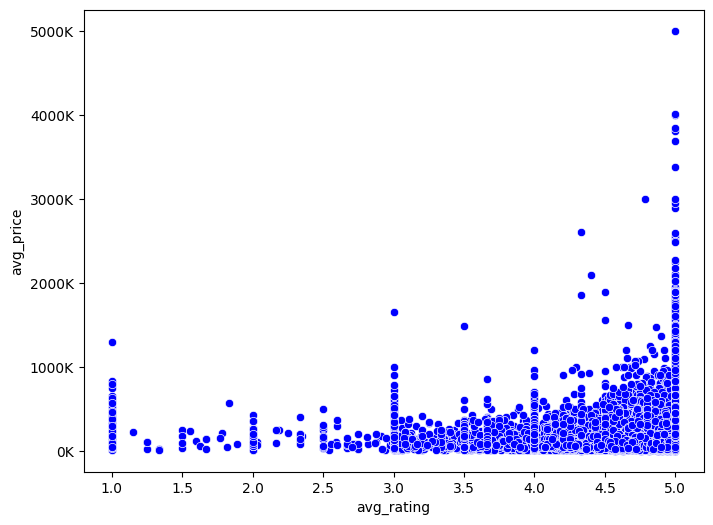

In [ ]:
pv_rating_price = df.groupby("product_id")[["price", "rating"]].mean().reset_index()
pv_rating_price.rename(columns={"price": "avg_price", "rating": "avg_rating"}, inplace=True)

plt.figure(figsize=(8,6))
sns.scatterplot(x= pv_rating_price["avg_rating"] , y= pv_rating_price["avg_price"], color='b')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.show()

In [ ]:
correlation = pv_rating_price["avg_price"].corr(pv_rating_price["avg_rating"])
correlation

0.035833501719925054

Ta thấy biến price hoàn toàn không ảnh hưởng đến rating của sản phẩm cao hay không. Hệ số tương quan giữa hai biến cũng dường như bằng 0.

In [ ]:
df_visualize = df

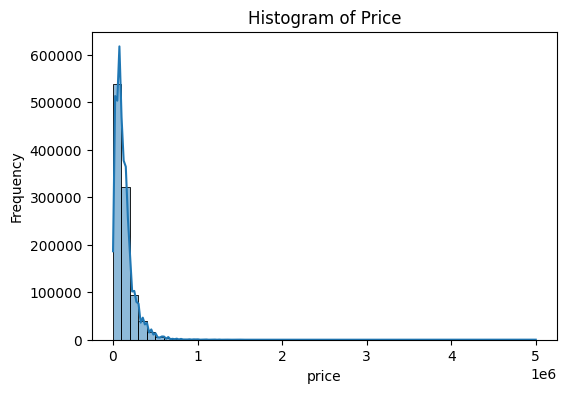

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df_visualize["price"], bins=50, kde=True)  # kde=True adds a kernel density estimate
plt.xlabel("price")
plt.ylabel("Frequency")
plt.title(f"Histogram of Price")
plt.show()

Nhìn vào biểu đồ Histogram, ta thấy các sản phẩm chủ yếu ở mức giá dưới 1 triệu, bị lệnh phải mạnh do có một vài sản phẩm có giá trị cao đến 5 triệu

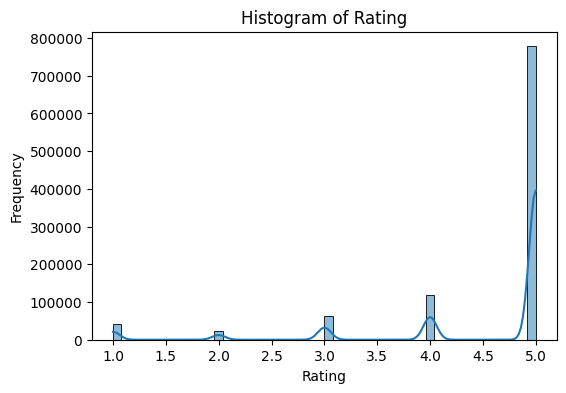

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df_visualize["rating"], bins=50, kde=True)  # kde=True adds a kernel density estimate
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title(f"Histogram of Rating")
plt.show()

Nhìn vào biểu đồ Histogram, ta thấy các sản phẩm chủ yếu được rating ở mức 5, dữ liệu lệch trái

## Phân tích biến phân loại

In [ ]:
distinct_product_count = df["product_id"].nunique()
distinct_product_count

31267

Dữ liệu có tổng cộng 31.267 sản phẩm được rating

In [ ]:
distinct_user_count = df["user_id"].nunique()

Dữ liệu có tổng cộng 650.636 user có thực hiện rate

In [ ]:
filtered_df = df[df["sub_category"].notnull()]

# Nhóm theo sub_category và tính các chỉ số
product_summary = filtered_df.groupby("sub_category").agg(
    distinct_product_count = ("product_id", "nunique"),
    total_rating = ("product_id", "count"),
    avg_rating = ("rating", "mean"),
    avg_price = ("price", "mean")
).reset_index()

In [ ]:
# Sắp xếp theo số lượng sản phẩm khác nhau (nhiều -> ít)
product_total_product = product_summary.sort_values(by="distinct_product_count", ascending=False)

# Sắp xếp theo tổng lượt đánh giá (nhiều -> ít)
product_total_rating = product_summary.sort_values(by="total_rating", ascending=False)

# Sắp xếp theo điểm rating trung bình (cao -> thấp)
product_avg_rating = product_summary.sort_values(by="avg_rating", ascending=False)

# Sắp xếp theo giá trung bình (cao -> thấp)
product_avg_price = product_summary.sort_values(by="avg_price", ascending=False)

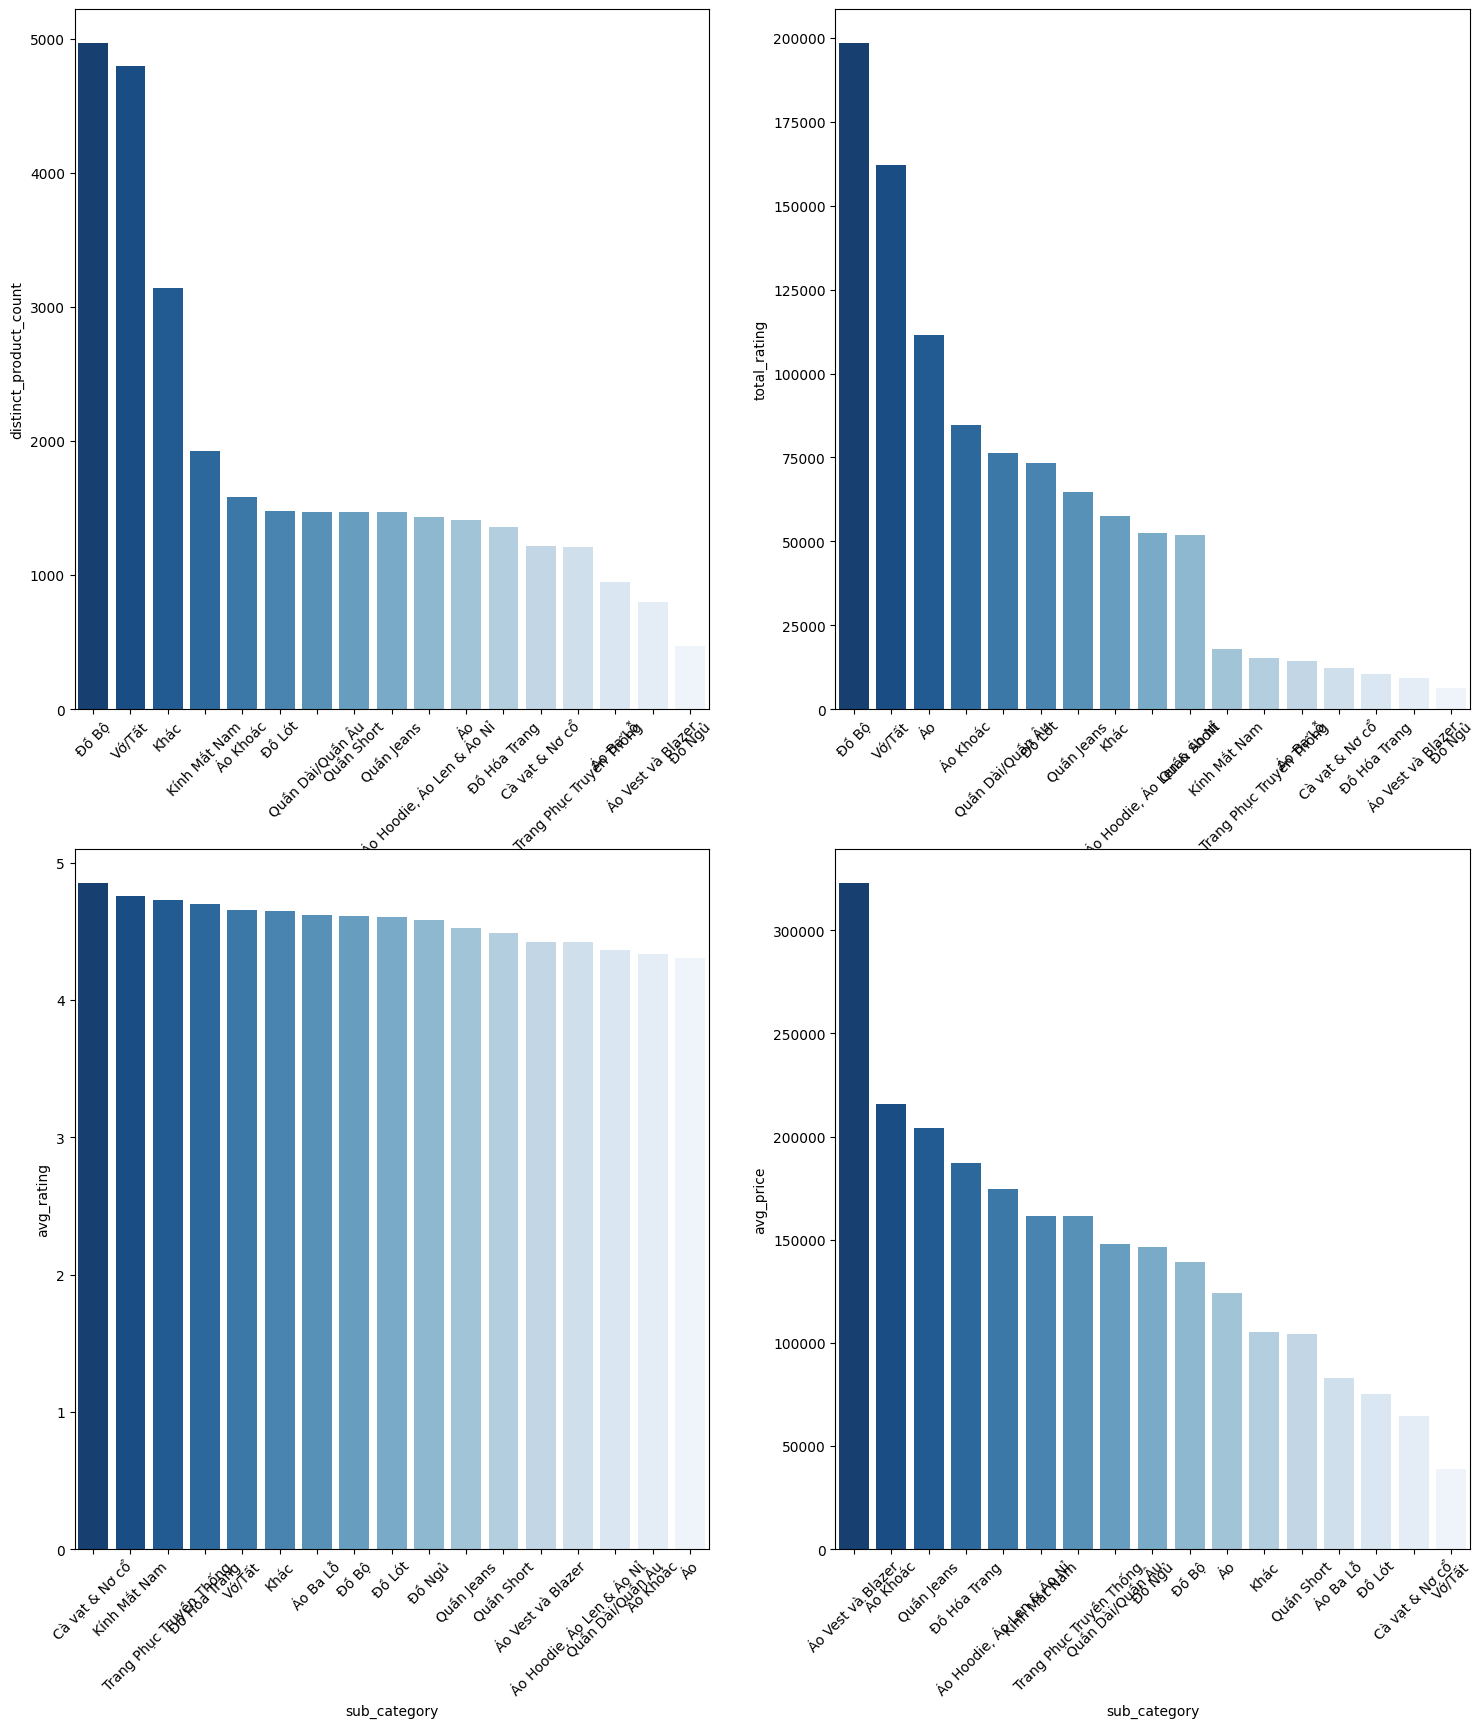

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 20))

sns.barplot(x=product_total_product ['sub_category'], y = product_total_product ['distinct_product_count'] , palette="Blues_r", ax= axes[0,0])
sns.barplot(x=product_total_rating ['sub_category'], y = product_total_rating ['total_rating'] , palette="Blues_r", ax= axes[0,1])
sns.barplot(x=product_avg_rating ['sub_category'], y = product_avg_rating ['avg_rating'] , palette="Blues_r", ax= axes[1,0])
sns.barplot(x=product_avg_price ['sub_category'], y = product_avg_price ['avg_price'] , palette="Blues_r", ax= axes[1,1])

for i in range(2):  # Rows
    for j in range(2):  # Columns
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)


Nhìn vào biểu đồ ta có thể kết luận:
- Ngành hàng thời trang nam, Shopee chủ yếu bán các sản phẩm về đồ bộ, vớ tất, kéo theo đây cũng là hai nhóm sản phẩm có nhiều số lượng rating nhất
- Sản phẩm có giá trị bán trung bình cao nhất là Áo Vest và Blazer, áo khoác, tuy nhiên trung bình điểm rating cũng có số điểm trung bình thấp hơn so với các nhóm sản phẩm khác có trung bình giá bán thấp hơn.
- Cà vạt & Nơ cổ có trung bình giá bán thấp nhưng chất lượng khá tốt khi đứng đầu về điểm rating

In [ ]:
products_summary = df.groupby(["product_id", "product_name"]).agg(
    total_rating = ("product_id", "count"),
    avg_rating = ("rating", "mean"),
    avg_price = ("price", "mean")
).reset_index()

# Hiển thị kết quả
products_summary

,product_id,product_name,total_rating,avg_rating,avg_price
0,100,[Mã SKAMFSW175 giảm 10K đơn 50K] Cà vạt nam th...,134,4.328358,62500.0
1,101,[Mã SKAMFSW175 giảm 10K đơn 50K] Nơ đeo cổ nam...,97,4.793814,24450.0
2,102,Cà vạt nam bản nhỏ - cavat 5cm hàng tp hcm sản...,132,4.371212,18500.0
3,103,Cà Vạt Nam Bản Nhỏ 5cm Hàn Quốc - Cavat ...,135,4.385185,22750.0
4,104,Cà vạt nam bản nhỏ 5cm - cavat học sinh sinh v...,95,4.778947,14000.0
...,...,...,...,...,...
31141,261090,Bộ quần áo đũi trung niên nam cho ông cho bố -...,1,5.000000,250000.0
31142,261095,BỘ ĐỒ PIJAMA NAM NGẮN TAY QSHOP QM311-QM312,1,5.000000,280000.0
31143,261096,ÁO NGỦ CAO CẤP PALTAL 072 0822,1,5.000000,365000.0
31144,261416,Fzg * Bộ Đồ Ngủ Tay Ngắn Chất Liệu Cotton 100%...,1,5.000000,193727.0


In [ ]:
# Top 10 sản phẩm có nhiều lượt đánh giá nhất
products_total_rating = products_summary.sort_values(by="total_rating", ascending=False).head(10)

# Top 10 sản phẩm có điểm đánh giá trung bình cao nhất
products_avg_rating = products_summary.sort_values(by="avg_rating", ascending=False).head(10)

# Top 10 sản phẩm có giá trung bình cao nhất
products_avg_price = products_summary.sort_values(by="avg_price", ascending=False).head(10)

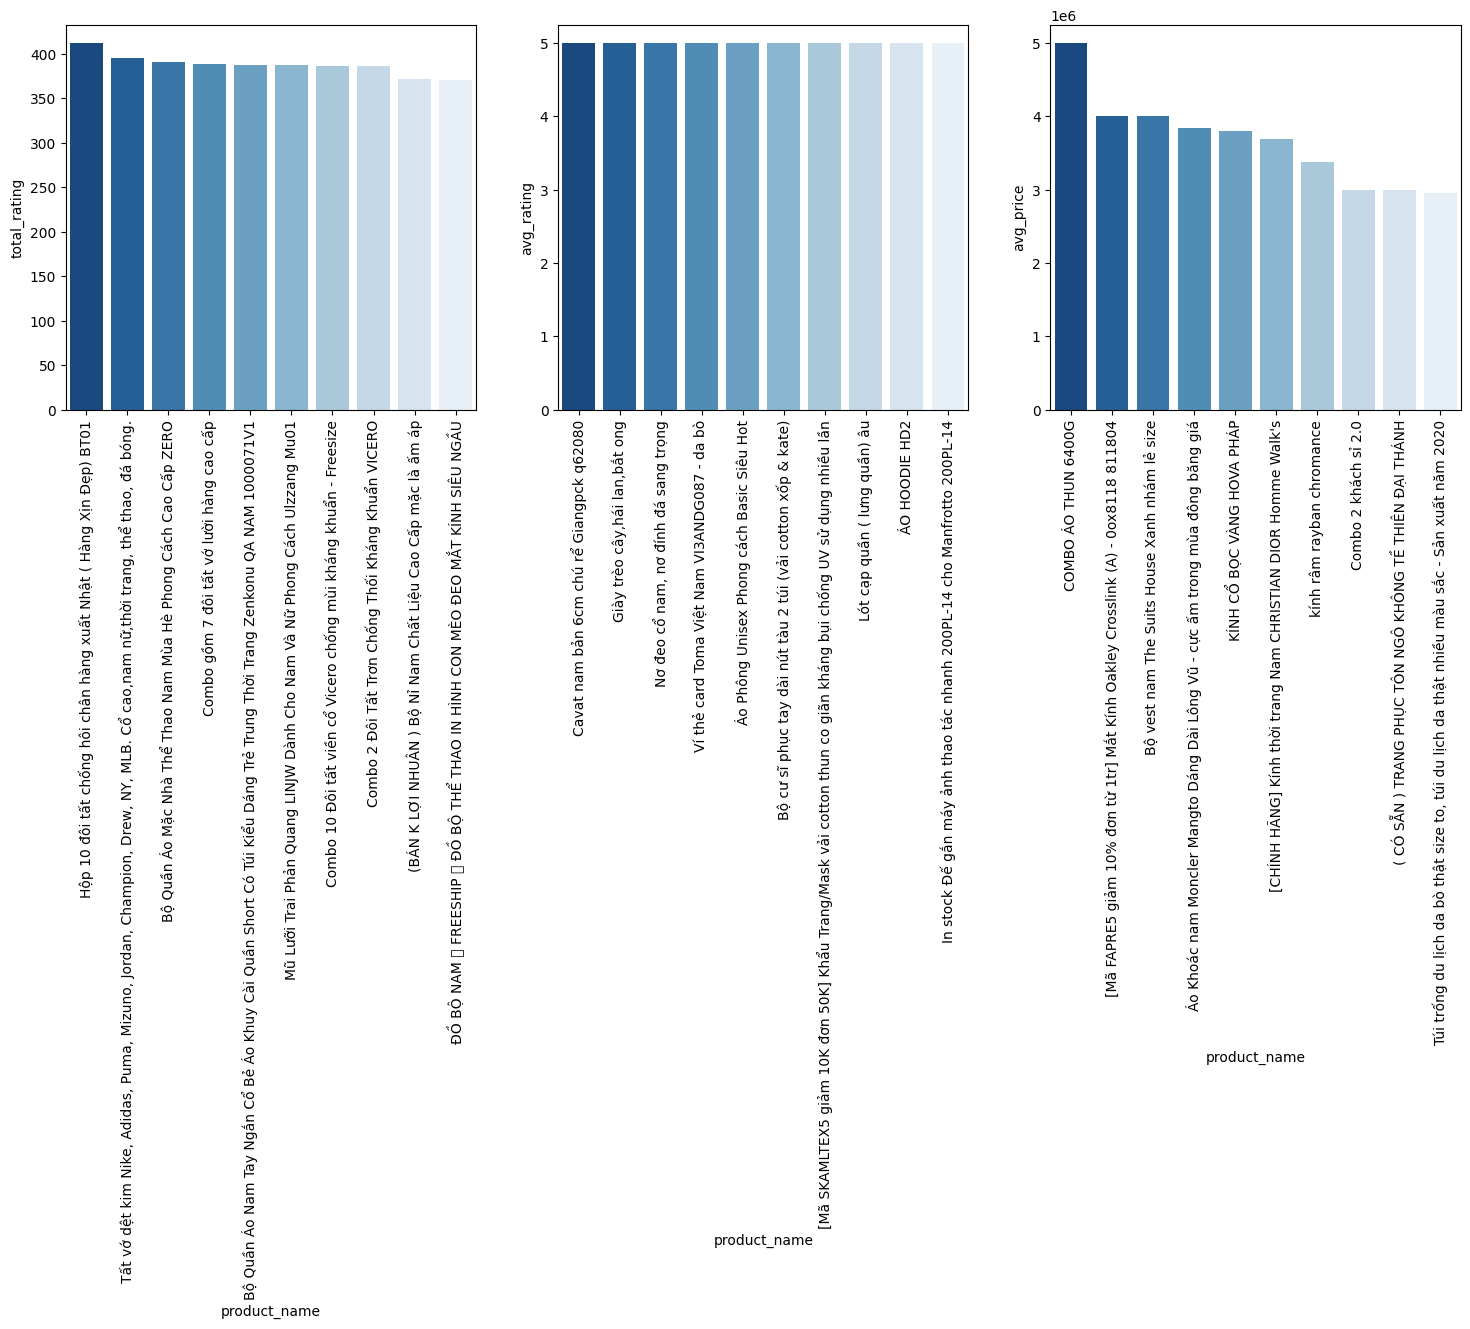

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=products_total_rating ['product_name'], y = products_total_rating ['total_rating'] , palette="Blues_r", ax= axes[0])
sns.barplot(x=products_avg_rating ['product_name'], y = products_avg_rating ['avg_rating'] , palette="Blues_r", ax= axes[1])
sns.barplot(x=products_avg_price ['product_name'], y = products_avg_price ['avg_price'] , palette="Blues_r", ax= axes[2])

for i in range(3):  # Rows
      axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

- Hai sản phẩm về tất có số lượt rating nhiều nhất và có trung bình điểm rating cao nhất là sản phẩm về tất.
- Combo áo thun có giá bán cao nhất trong ngành hàng

# Bước 4: Modeling & Evaluation

Thực hiện xây dựng mô hình gợi ý sản phẩm cho khách hàng bằng Surprise Recommendation

In [ ]:
df_rating = df_rating.sample(n=40000, random_state=42)

In [ ]:
df_rating = df_rating[["product_id", "user_id", "rating"]]
df_rating.head()

,product_id,user_id,rating
26641,20110,212,5
206410,181373,144905,5
614255,11121,80,5
251832,18744,143963,4
887606,17237,13747,5


In [ ]:
n_ratings = len(df_rating)
n_movies = len(df_rating['product_id'].unique())
n_users = len(df_rating['user_id'].unique())

In [ ]:
display(n_ratings, n_movies, n_users)

40000

15636

32484

In [ ]:
reader = Reader()
data = Dataset.load_from_df(df_rating[['user_id', 'product_id', 'rating']], reader)

In [ ]:
algorithms = [KNNBasic(), SVD(), NormalPredictor()]
# Run 5-fold cross-validation and print results
for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=4, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9825  1.0250  0.9954  1.0050  1.0020  0.0155  
MAE (testset)     0.7066  0.7252  0.7118  0.7148  0.7146  0.0068  
Fit time          6.90    8.55    7.74    6.60    7.45    0.76    
Test time         0.06    0.09    0.09    0.06    0.08    0.01    
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9535  0.9381  0.9480  0.9428  0.9456  0.0057  
MAE (testset)     0.6801  0.6753  0.6794  0.6740  0.6772  0.0026  
Fit time          0.56    0.53    0.41    0.43    0.49    0

In [ ]:
# If the results are OK => getting full dataset => fit model
algorithm = SVD()
trainset = data.build_full_trainset()
algorithm.fit(trainset)

In [ ]:
# userId = 1 has seen some movies:
userId = 8
df_select = df_rating[(df_rating['user_id'] == userId) & (df_rating['rating'] >=3)]
df_select = df_select.set_index('product_id')
#df_select = df_select.join(df_title)['Name']
df_select.head(df_select.shape[0])

,user_id,rating
product_id,,
18451,8,4
23338,8,5
2086,8,4


In [ ]:
df_score = df_rating[["product_id"]]

In [ ]:
df_score['EstimateScore'] = df_score['product_id'].apply(lambda x: algorithm.predict(userId, x).est)
df_score = df_score.sort_values(by=['EstimateScore'], ascending=False)

In [ ]:
df_score = df_score.drop_duplicates()

In [ ]:
df_score.head()

,product_id,EstimateScore
915958,171616,5.000000
436220,23520,4.988801
561045,25821,4.964531
389436,232253,4.960499
342990,231580,4.955976


In [ ]:
merged_df = pd.merge(df_score, df_product, on='product_id', how='inner')
merged_df.head()

,product_id,EstimateScore,product_name,category,sub_category,link,image,price,rating,description
0,171616,5.000000,vớ dài dri fit,Thời Trang Nam,Vớ/Tất,https://shopee.vn/v%E1%BB%9B-d%C3%A0i-dri-fit-...,https://cf.shopee.vn/file/8eec1b8922038bf9b76d...,80000.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nVớ/Tất\nKho ...
1,23520,4.988801,Áo váy đôi: Váy rút nếp một bên nữ phong cách ...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/%C3%81o-v%C3%A1y-%C4%91%C3%B...,https://cf.shopee.vn/file/4b94539b46c9c084da7e...,290000.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nĐồ Bộ\nMùa\n...
2,25821,4.964531,QUẦN LÓT NAM TAM GIÁC THUN LẠNH CAO CẤP SIÊU Đ...,Thời Trang Nam,Đồ Lót,https://shopee.vn/QU%E1%BA%A6N-L%C3%93T-NAM-TA...,NaN,29000.0,5.0,Danh Mục\nShopee\nThời Trang Nam\nĐồ Lót\nQuần...
3,232253,4.960499,Bộ Quần Áo Thể Thao Mẫu In Hình Chú Chuột Dễ T...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/B%E1%BB%99-Qu%E1%BA%A7n-%C3%...,NaN,62000.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nĐồ Bộ\nKiểu ...
4,231580,4.955976,( Ảnh thật ) S0557 Set đũi áo sơ mi và chân vá...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/(-%E1%BA%A2nh-th%E1%BA%ADt-)...,https://cf.shopee.vn/file/570086308909c4d48926...,440000.0,5.0,Danh Mục\nShopee\nThời Trang Nam\nĐồ Bộ\nChất ...


In [1]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
import pickle
import os
import warnings

# Ẩn cảnh báo
warnings.filterwarnings("ignore")
print("Môi trường đã sẵn sàng!")

# Đường dẫn cục bộ (thay đổi theo máy bạn)
DATA_DIR = 'D:/Streamlit'
PRODUCT_FILE = os.path.join(DATA_DIR, 'Products_ThoiTrangNam_raw.csv')
RATING_FILE = os.path.join(DATA_DIR, 'Products_ThoiTrangNam_rating_raw.csv')

# Đọc dữ liệu sản phẩm
df_product = pd.read_csv(PRODUCT_FILE)
df_product = df_product.dropna(subset=['image'])
df_product['description'].fillna("Không có mô tả", inplace=True)
df_product = df_product[df_product['rating'] >= 3.0].reset_index(drop=True)
print(f"Số lượng sản phẩm sau khi lọc: {len(df_product)}")

# Đọc dữ liệu rating
df_rating = pd.read_csv(RATING_FILE, sep="\t")
df_rating = df_rating[["product_id", "user_id", "rating"]]
if len(df_rating) > 40000:  # Lấy mẫu nếu dữ liệu lớn
    df_rating = df_rating.sample(n=40000, random_state=42)
print(f"Số lượng rating sau khi lấy mẫu: {len(df_rating)}")

# Chuẩn bị dữ liệu cho Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rating[['user_id', 'product_id', 'rating']], reader)
trainset = data.build_full_trainset()

# Huấn luyện mô hình SVD
print("Xây dựng và huấn luyện mô hình Surprise SVD...")
algo = SVD()
algo.fit(trainset)

# Lưu mô hình SVD
with open(os.path.join(DATA_DIR, 'surprise_svd_model.pkl'), 'wb') as f:
    pickle.dump(algo, f)
print("Mô hình Surprise SVD đã được lưu tại:", os.path.join(DATA_DIR, 'surprise_svd_model.pkl'))

# Lưu dữ liệu đã xử lý
df_product.to_csv(os.path.join(DATA_DIR, 'processed_products.csv'), index=False)
df_rating.to_csv(os.path.join(DATA_DIR, 'processed_ratings.csv'), index=False)
print("Dữ liệu đã xử lý đã được lưu!")


Môi trường đã sẵn sàng!
Số lượng sản phẩm sau khi lọc: 21006
Số lượng rating sau khi lấy mẫu: 40000
Xây dựng và huấn luyện mô hình Surprise SVD...
Mô hình Surprise SVD đã được lưu tại: D:/Streamlit\surprise_svd_model.pkl
Dữ liệu đã xử lý đã được lưu!
